# What are standarization and normalization? Test with iris data set in Scikit-learn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


/opt/conda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


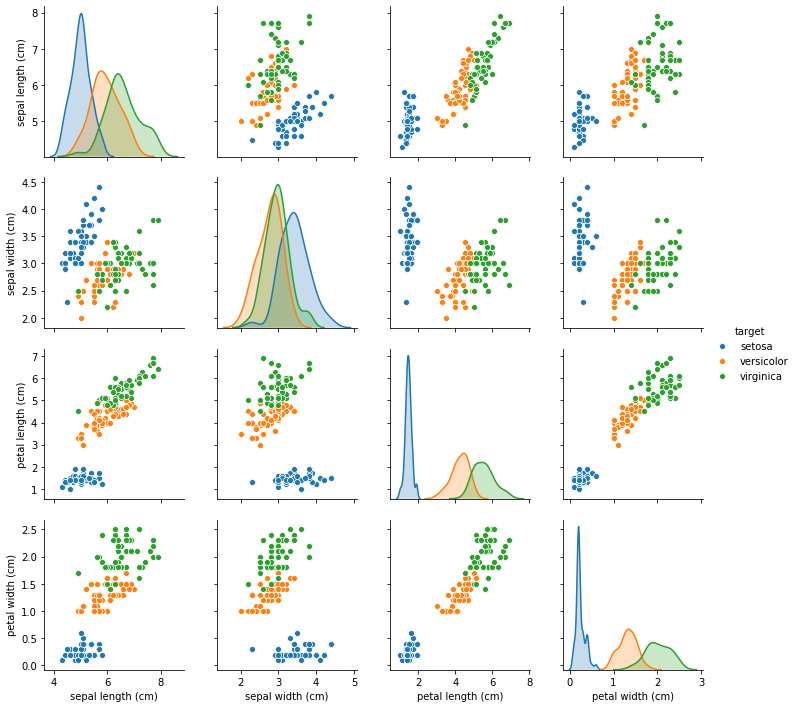

In [4]:
%matplotlib inline
import seaborn as sns
iris_dataset = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_dataset['target'] = iris.target
iris_dataset.loc[iris_dataset['target'] == 0, 'target'] = "setosa"
iris_dataset.loc[iris_dataset['target'] == 1, 'target'] = "versicolor"
iris_dataset.loc[iris_dataset['target'] == 2, 'target'] = "virginica"
sns.pairplot(iris_dataset, hue="target")

In [5]:
# apply MinMaxScaler for iris data set, [0, 1] for the range
from sklearn.preprocessing import MinMaxScaler
df_n = df.copy()
min_max_scaler = MinMaxScaler()
df_n.iloc[:, [0, 1, 2, 3]] = min_max_scaler.fit_transform(df_n.iloc[:, [0, 1, 2, 3]])
df_n.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


In [6]:
df_n.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056,1.000000
std,0.230018,0.181611,0.299203,0.317599,0.819232
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333,0.000000
50%,0.416667,0.416667,0.567797,0.500000,1.000000
75%,0.583333,0.541667,0.694915,0.708333,2.000000
max,1.000000,1.000000,1.000000,1.000000,2.000000


In [7]:
# apply StandardScaler for iris data set, this is z-score normalization
from sklearn.preprocessing import StandardScaler
df_s = df.copy()
std_scaler = StandardScaler()
df_s.iloc[:, [0, 1, 2, 3]] = std_scaler.fit_transform(df_s.iloc[:, [0, 1, 2, 3]])
df_s.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


In [8]:
df_s.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,150.000000
mean,-2.775558e-16,-9.695948e-16,-8.652338e-16,-4.662937e-16,1.000000
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00,0.819232
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00,0.000000
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00,0.000000
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01,1.000000
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01,2.000000
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00,2.000000


In [11]:
import mglearn
from sklearn.model_selection import train_test_split

def decision_boundary(df, clf, ax):
    X = df.iloc[:, [0, 2]] 
    y = df['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=39)
    clf.fit(X_train, y_train)
    print('Classifier: {}'.format(clf))
    print('Test set score: {:.2f}'.format(clf.score(X_test, y_test)))
    
    ret = X.to_numpy()
    mglearn.plots.plot_2d_separator(clf, ret, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(ret[:, 0], ret[:, 1], y.to_numpy(), ax=ax)

/opt/conda/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Classifier: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
Test set score: 0.97
Classifier: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
Test set score: 0.95
Classifier: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')
Test set score: 0.97


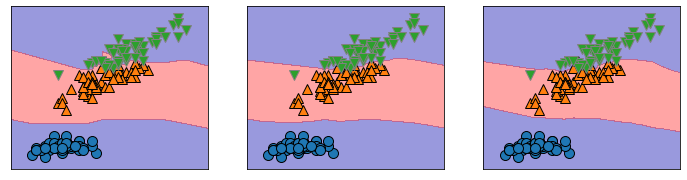

In [12]:
from sklearn.neighbors import KNeighborsClassifier

fig, axes = plt.subplots(1, 3, figsize=(12, 3))
for ax, n_neighbors in zip(axes, [1, 3, 6]):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    decision_boundary(df, clf, ax)

Classifier: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
Test set score: 0.97
Classifier: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
Test set score: 0.95
Classifier: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')
Test set score: 0.97


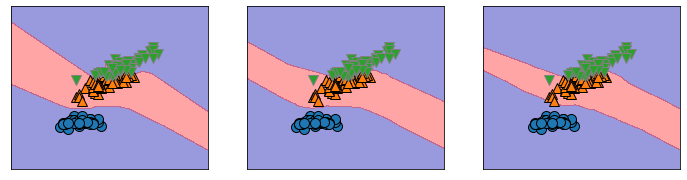

In [13]:
from sklearn.neighbors import KNeighborsClassifier

fig, axes = plt.subplots(1, 3, figsize=(12, 3))
for ax, n_neighbors in zip(axes, [1, 3, 6]):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    decision_boundary(df_n, clf, ax)

Classifier: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
Test set score: 0.97
Classifier: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
Test set score: 0.95
Classifier: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')
Test set score: 0.97


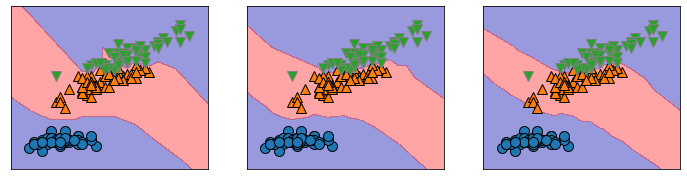

In [14]:
from sklearn.neighbors import KNeighborsClassifier

fig, axes = plt.subplots(1, 3, figsize=(12, 3))
for ax, n_neighbors in zip(axes, [1, 3, 6]):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    decision_boundary(df_s, clf, ax)